I will build a siamese network to detect if two face pictures are from the same person or not.

In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision import models
from PIL import Image

In [58]:
# Hyperparameters

BATCH_SIZE = 64
NUMB_EPOCHS = 100
LEARNING_RATE = 0.001
MOMENTUM = 0.9

IMG_SIZE = 64

In [59]:
all_data = pd.read_csv('data.csv')

# Split data into train and test sets
train_data = all_data.sample(frac=0.8, random_state=0)
val_data = all_data.drop(train_data.index)

In [60]:
class trainingDataset(Dataset):
    def __init__(self, imageFolderDataset, data, transform=None):
        self.imageFolderDataset=imageFolderDataset
        self.data=data
        self.transform=transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image1 = os.path.join(self.imageFolderDataset, self.data.iloc[idx, 0] + '.jpg')
        image2 = os.path.join(self.imageFolderDataset, self.data.iloc[idx, 1] + '.jpg')
        
        image1 = Image.open(image1)
        image2 = Image.open(image2)
        
        is_paired = self.data.iloc[idx, 2]
        if self.transform:
            image1 = self.transform(image1)
            image2 = self.transform(image2)
        return image1, image2, is_paired
        

In [61]:
train_set = trainingDataset(imageFolderDataset=os.path.join('archive', 'lfw-deepfunneled', 'lfw-deepfunneled'),
                            data = train_data,
                            transform=transforms.Compose([transforms.Resize((IMG_SIZE, IMG_SIZE)),
                                                          transforms.ToTensor() ]))

trainloader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

val_set = trainingDataset(imageFolderDataset=os.path.join('archive', 'lfw-deepfunneled', 'lfw-deepfunneled'),
                          data = val_data,
                          transform=transforms.Compose([transforms.Resize((IMG_SIZE, IMG_SIZE)),
                                                        transforms.ToTensor() ]))

valloader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=True)

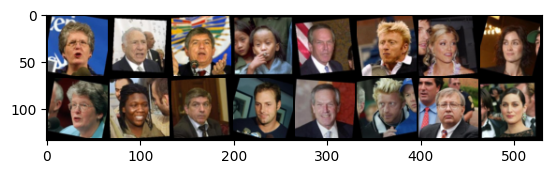

[1 0 1 0 1 1 0 1]


In [62]:
vis_dataloader = DataLoader(train_set,
                        shuffle=True,
                        batch_size=8)
dataiter = iter(vis_dataloader)


example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0],example_batch[1]),0)
plt.imshow(torchvision.utils.make_grid(concatenated).permute(1, 2, 0))
plt.show()
print(example_batch[2].numpy())

In [63]:
class SiameseNetwork(nn.Module):
    def __init__(self):
        super(SiameseNetwork, self).__init__()
        
        self.cnn1 = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(3, 64, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Dropout2d(p=0.2),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 64, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Dropout2d(p=0.2),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(64, 32, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            nn.Dropout2d(p=0.2),
        )
        
        self.fc1 = nn.Linear(2*32*IMG_SIZE*IMG_SIZE, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 2)
        
    def forward(self, input1, input2):
        #Image 1
        output1 = self.cnn1(input1)
        output1 = output1.view(output1.size()[0], -1)
        
        # Image 2
        output2 = self.cnn1(input2)
        output2 = output2.view(output2.size()[0], -1)
        
        # Concatenate to compute the distance
        output = torch.cat((output1, output2), 1)
        output = F.relu(self.fc1(output))
        output = F.relu(self.fc2(output))
        output = self.fc3(output)      
        
        return output

Epoch:  0
Accuracy of the network on the validation set: 58 %


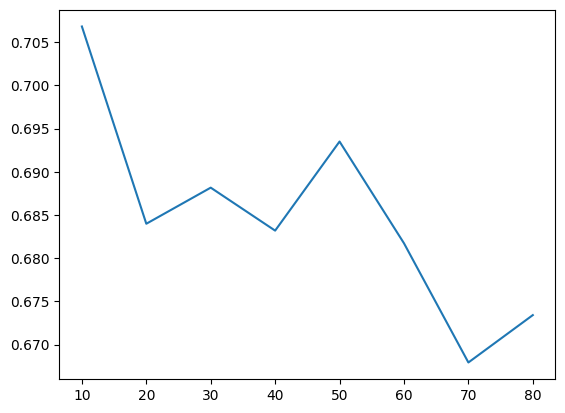

Epoch:  1
Accuracy of the network on the validation set: 61 %


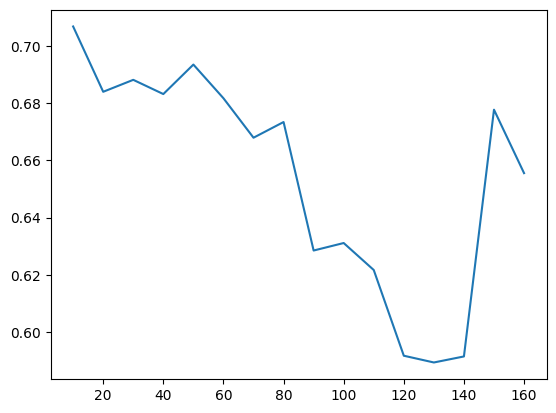

Epoch:  2
Accuracy of the network on the validation set: 62 %


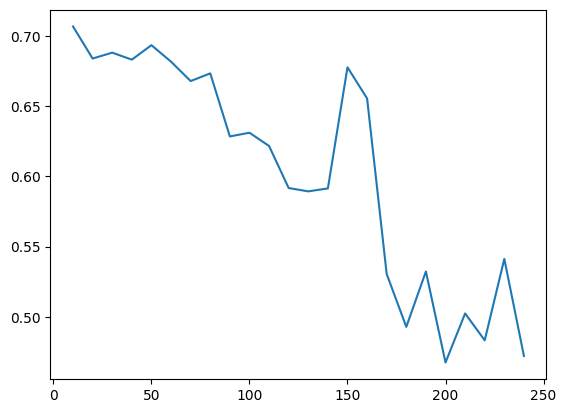

Epoch:  3
Accuracy of the network on the validation set: 66 %


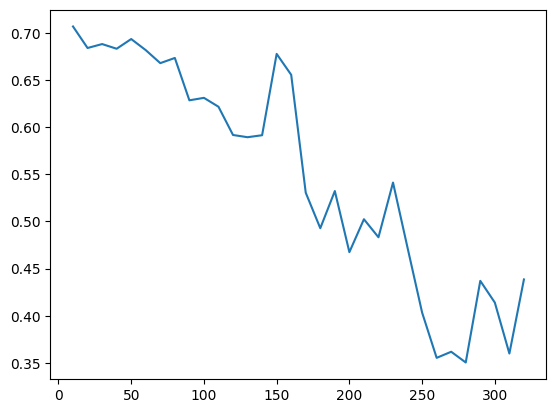

Epoch:  4
Accuracy of the network on the validation set: 65 %


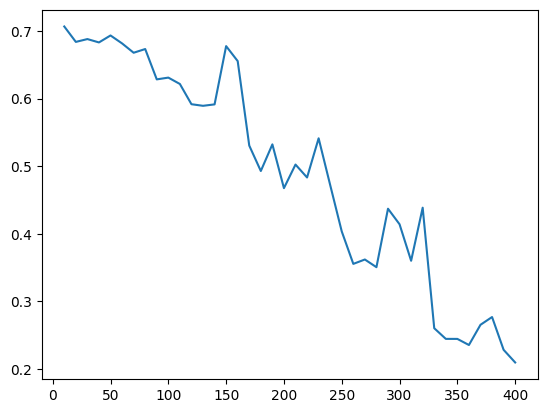

Epoch:  5
Accuracy of the network on the validation set: 67 %


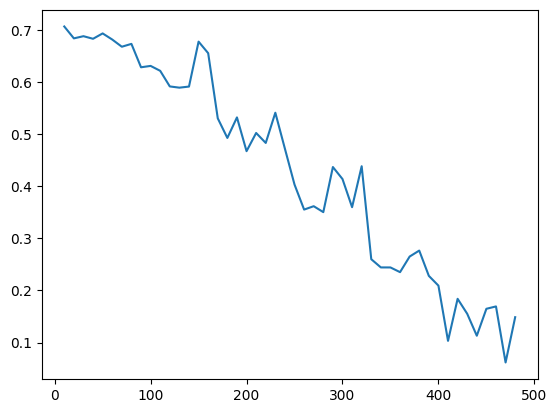

Epoch:  6
Accuracy of the network on the validation set: 67 %


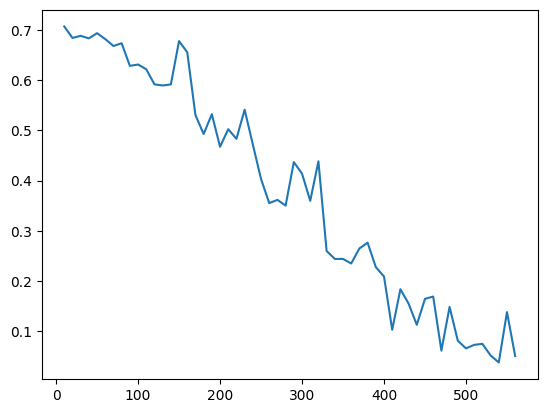

Epoch:  7
Accuracy of the network on the validation set: 69 %


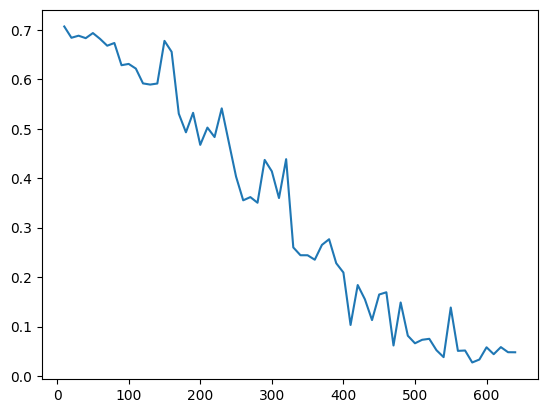

Epoch:  8
Accuracy of the network on the validation set: 69 %


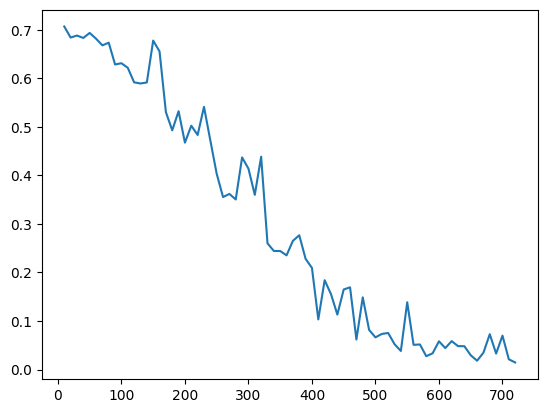

Epoch:  9
Accuracy of the network on the validation set: 69 %


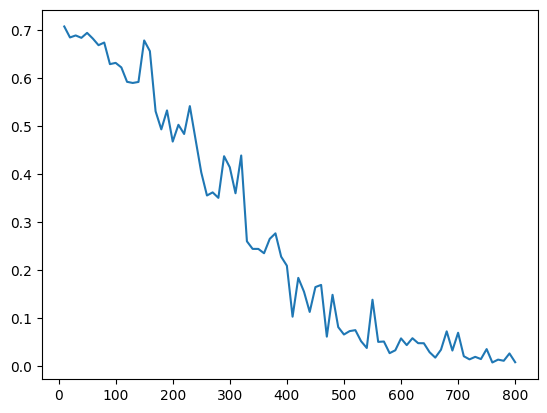

Epoch:  10
Accuracy of the network on the validation set: 68 %


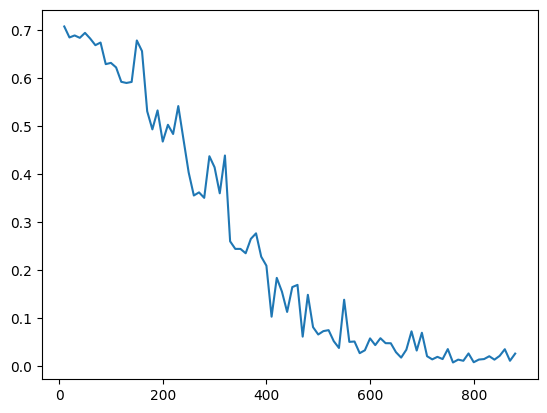

Epoch:  11
Accuracy of the network on the validation set: 68 %


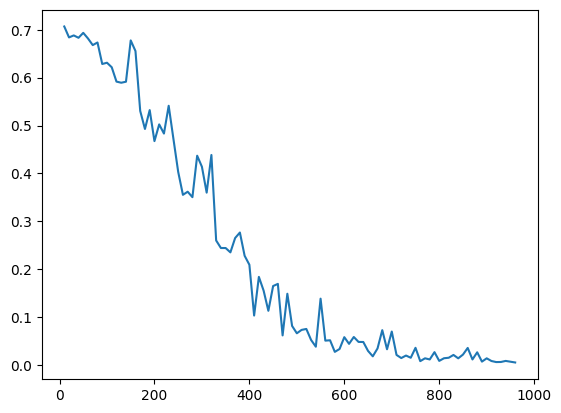

Epoch:  12
Accuracy of the network on the validation set: 69 %


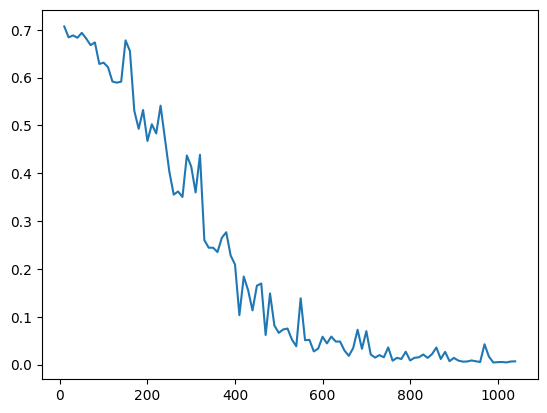

Epoch:  13
Accuracy of the network on the validation set: 68 %


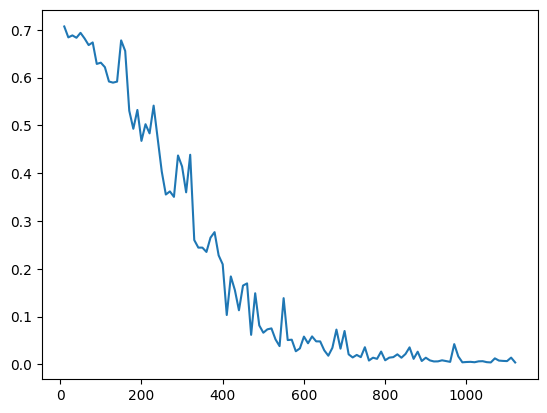

Epoch:  14
Accuracy of the network on the validation set: 70 %


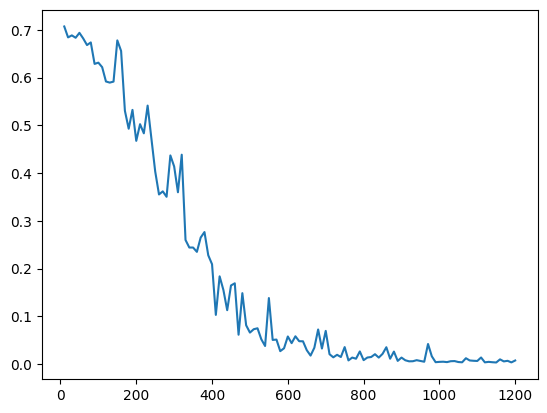

Epoch:  15
Accuracy of the network on the validation set: 69 %


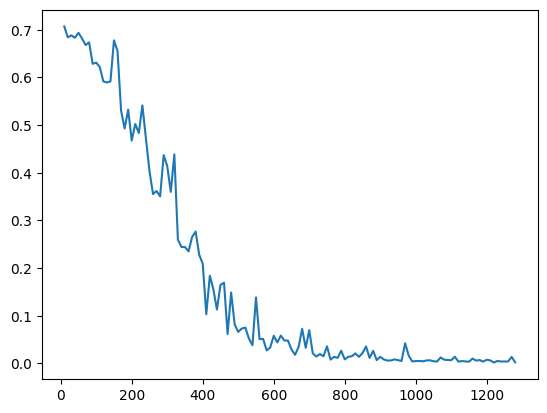

Epoch:  16
Accuracy of the network on the validation set: 70 %


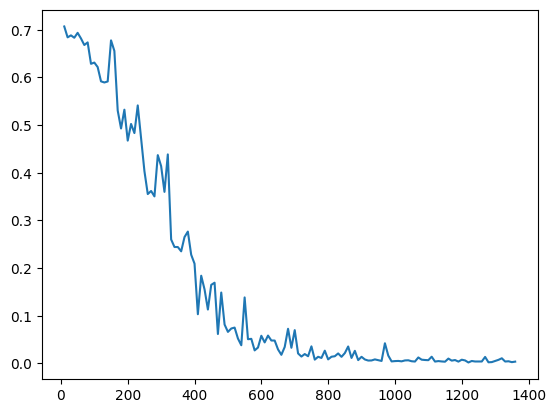

Epoch:  17
Accuracy of the network on the validation set: 69 %


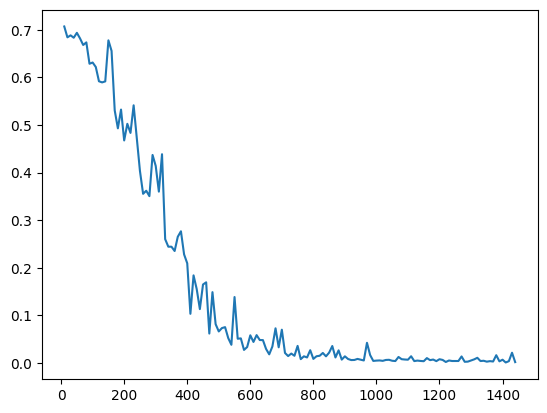

Epoch:  18
Accuracy of the network on the validation set: 69 %


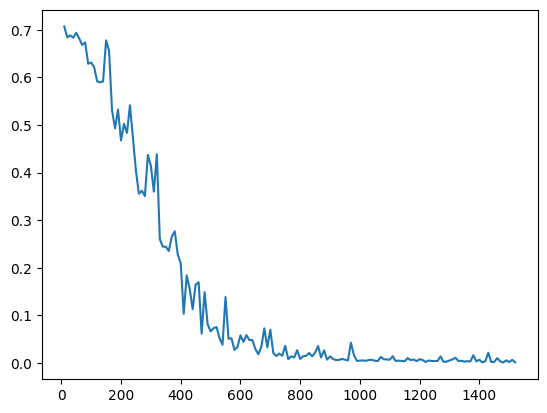

Epoch:  19
Accuracy of the network on the validation set: 70 %


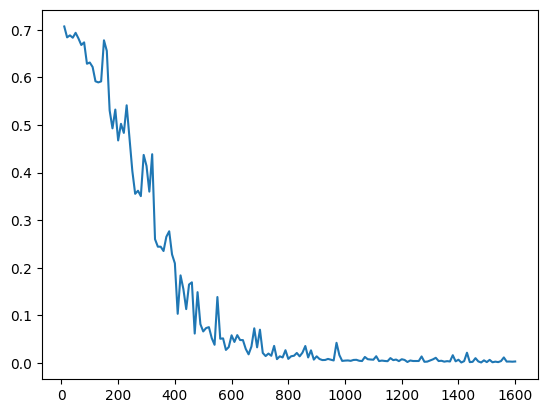

Epoch:  20
Accuracy of the network on the validation set: 68 %


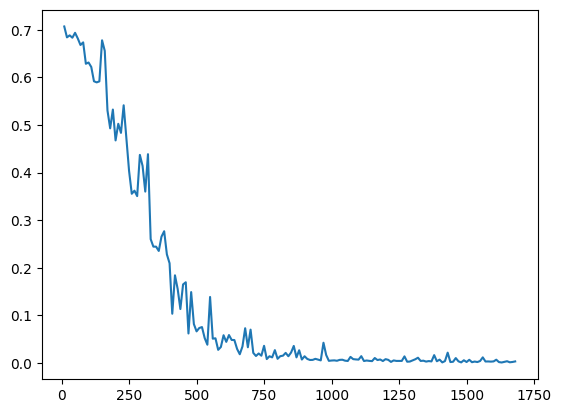

Epoch:  21
Accuracy of the network on the validation set: 69 %


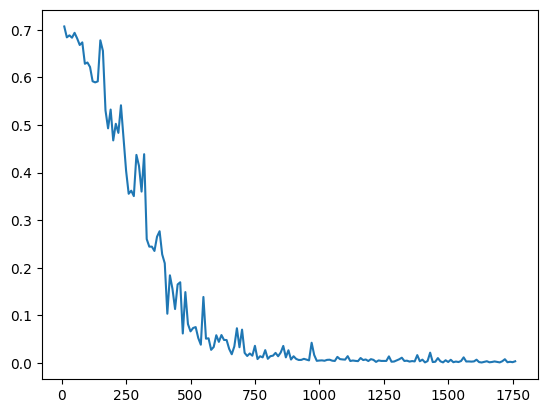

Epoch:  22
Accuracy of the network on the validation set: 70 %


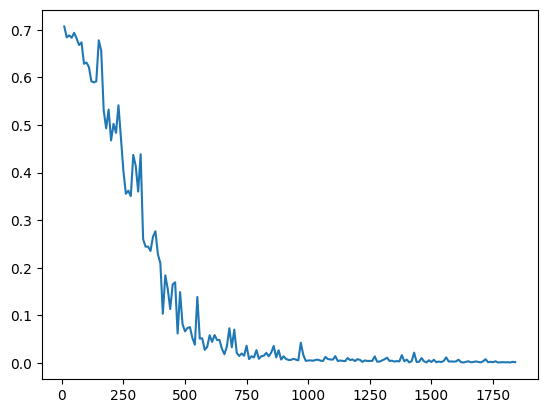

Epoch:  23
Accuracy of the network on the validation set: 70 %


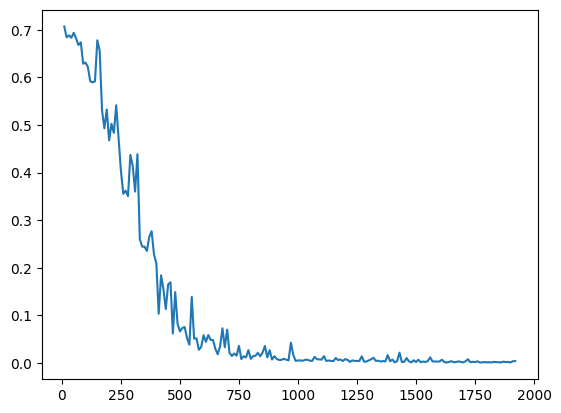

Epoch:  24
Accuracy of the network on the validation set: 69 %


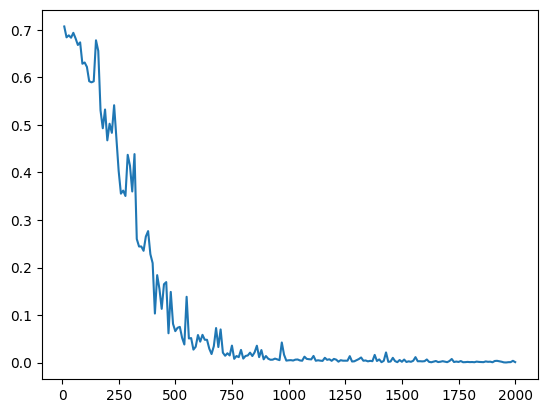

Epoch:  25
Accuracy of the network on the validation set: 69 %


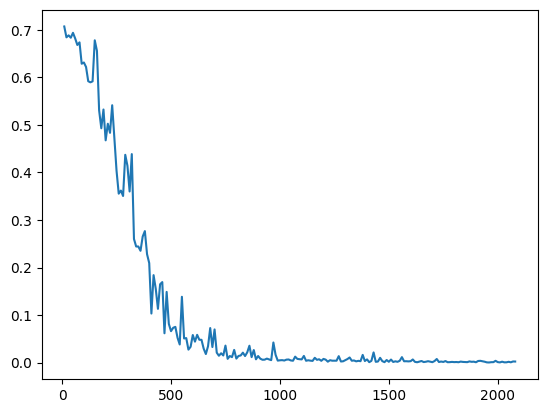

Epoch:  26
Accuracy of the network on the validation set: 68 %


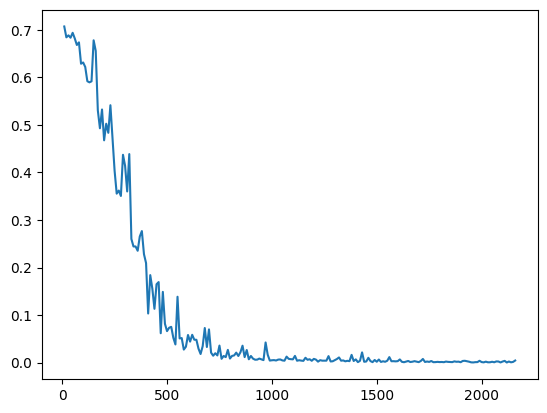

Epoch:  27
Accuracy of the network on the validation set: 70 %


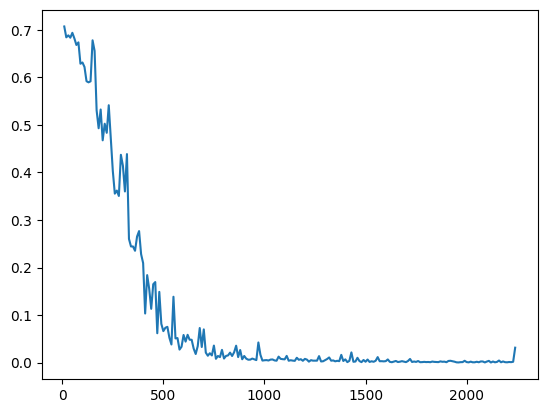

Epoch:  28
Accuracy of the network on the validation set: 70 %


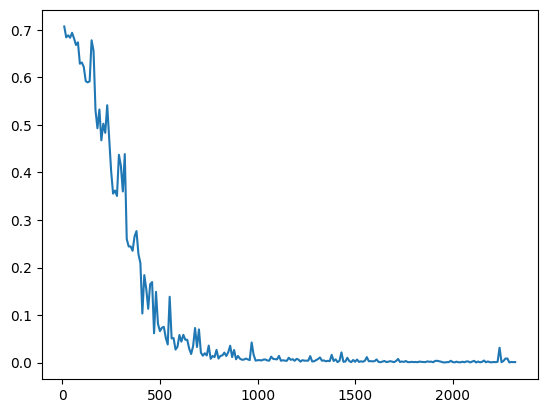

Epoch:  29
Accuracy of the network on the validation set: 68 %


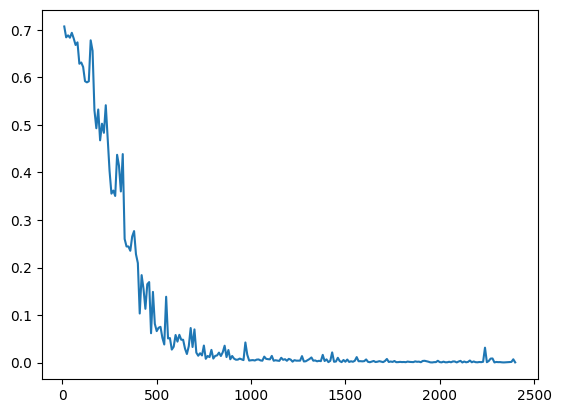

Epoch:  30
Accuracy of the network on the validation set: 70 %


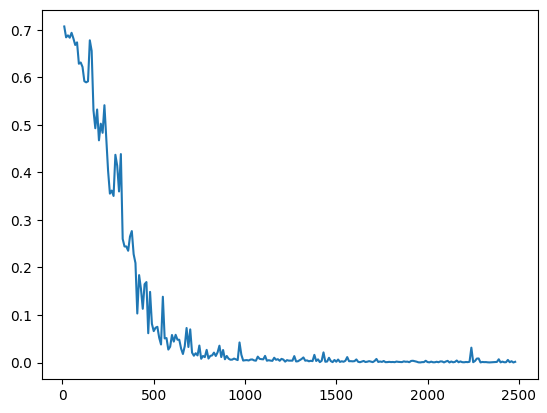

Epoch:  31
Accuracy of the network on the validation set: 69 %


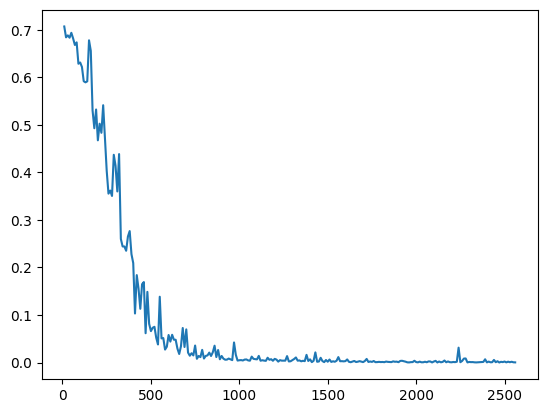

Epoch:  32
Accuracy of the network on the validation set: 70 %


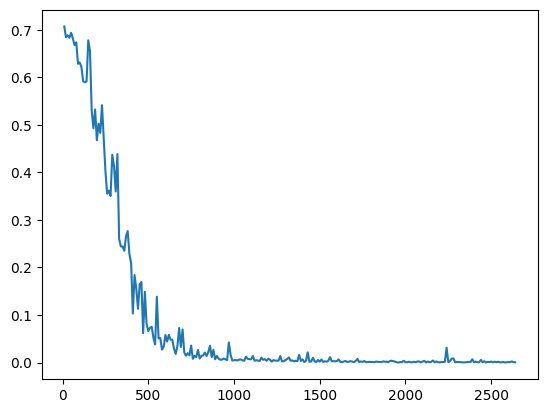

Epoch:  33
Accuracy of the network on the validation set: 70 %


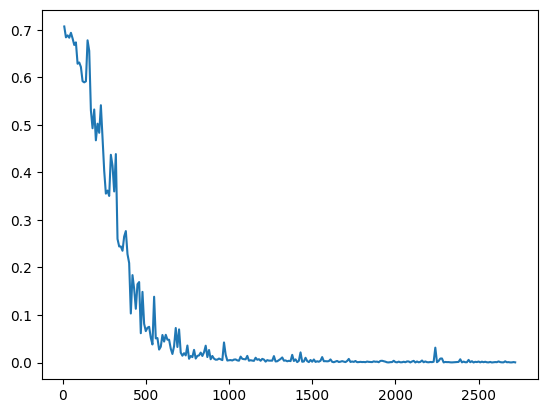

Epoch:  34
Accuracy of the network on the validation set: 69 %


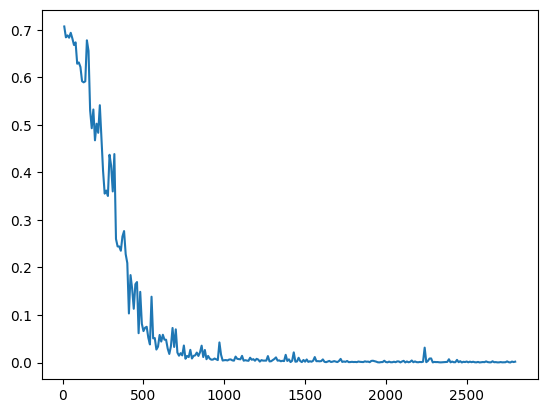

Epoch:  35
Accuracy of the network on the validation set: 69 %


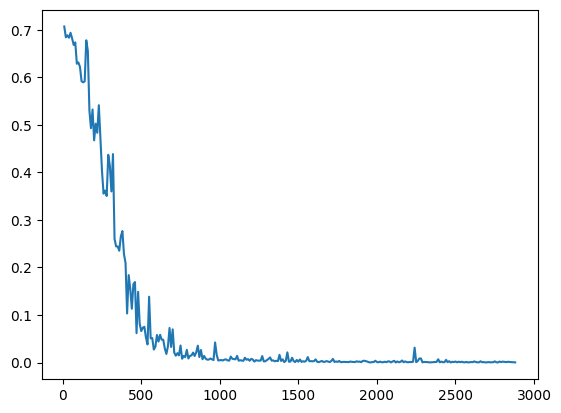

Epoch:  36
Accuracy of the network on the validation set: 70 %


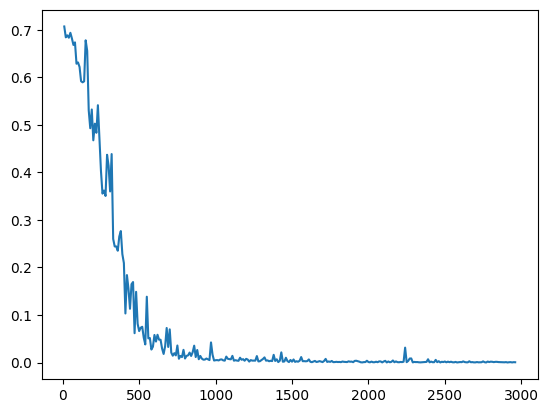

Epoch:  37
Accuracy of the network on the validation set: 70 %


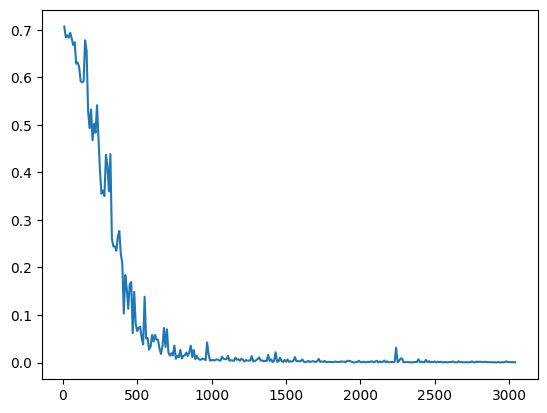

Epoch:  38
Accuracy of the network on the validation set: 69 %


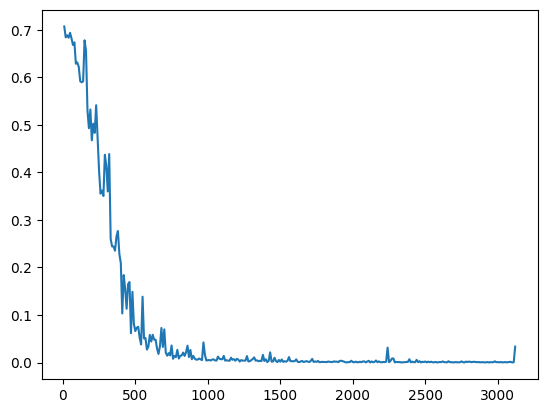

Epoch:  39
Accuracy of the network on the validation set: 70 %


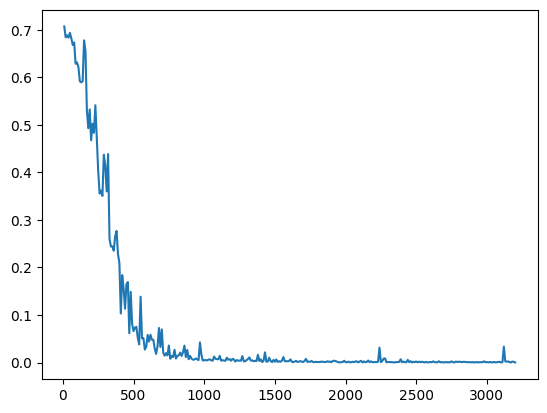

Epoch:  40
Accuracy of the network on the validation set: 69 %


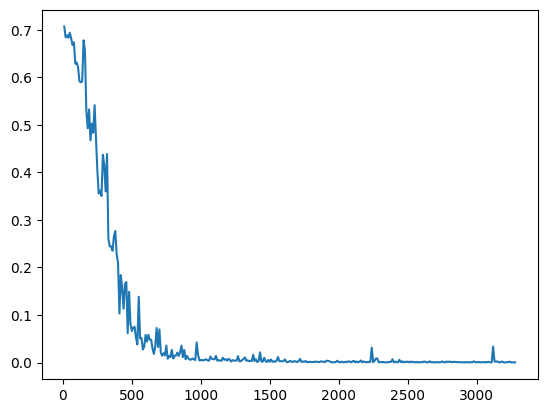

Epoch:  41
Accuracy of the network on the validation set: 71 %


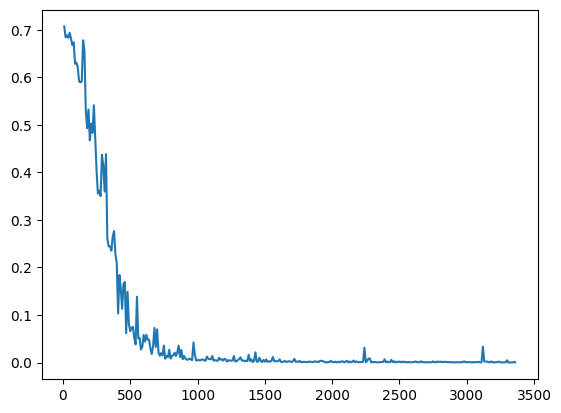

Epoch:  42
Accuracy of the network on the validation set: 70 %


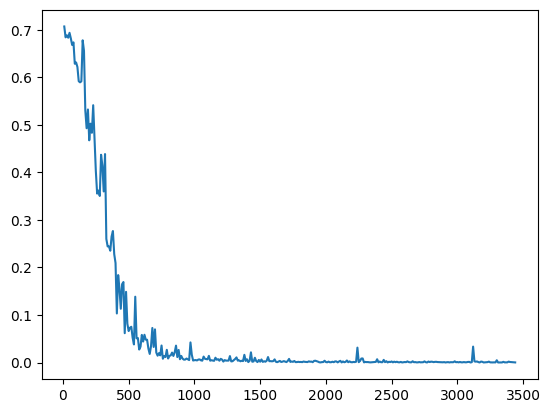

Epoch:  43
Accuracy of the network on the validation set: 69 %


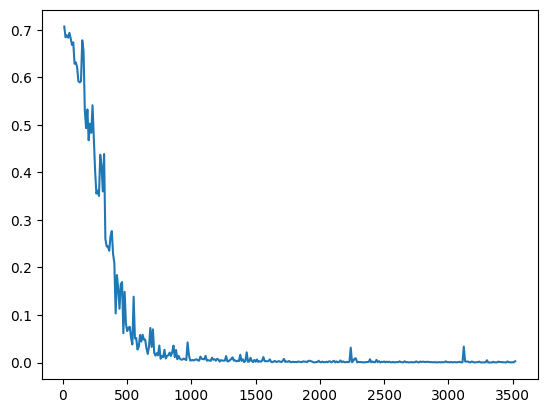

Epoch:  44
Accuracy of the network on the validation set: 70 %


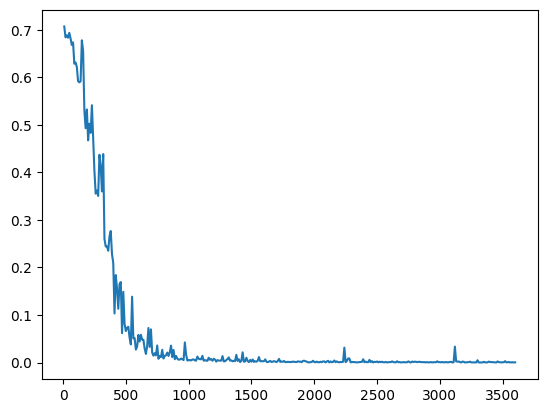

Epoch:  45
Accuracy of the network on the validation set: 70 %


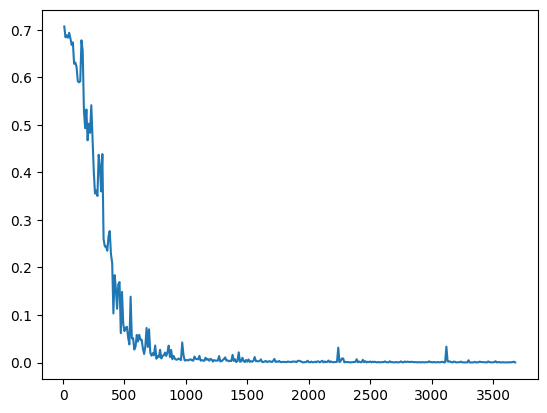

Epoch:  46
Accuracy of the network on the validation set: 70 %


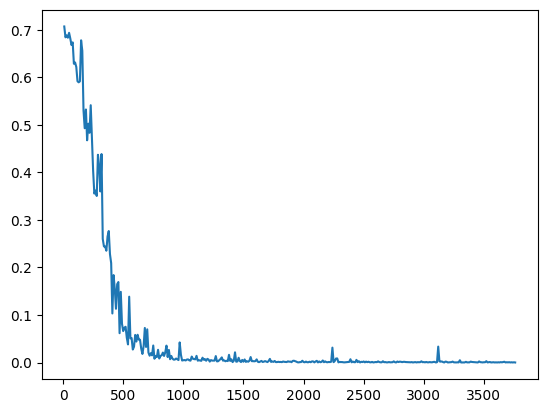

Epoch:  47
Accuracy of the network on the validation set: 70 %


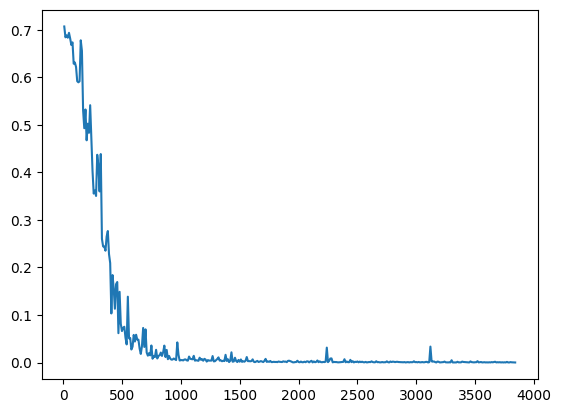

Epoch:  48
Accuracy of the network on the validation set: 69 %


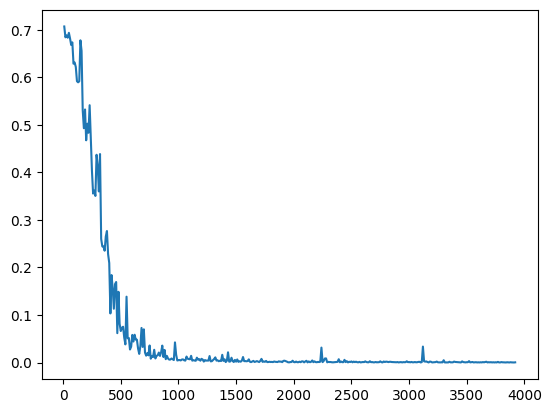

Epoch:  49
Accuracy of the network on the validation set: 69 %


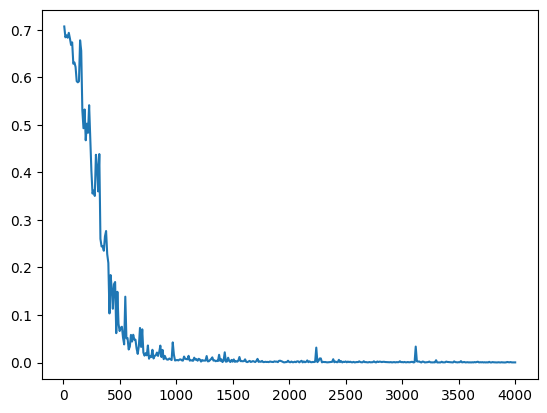

Epoch:  50
Accuracy of the network on the validation set: 70 %


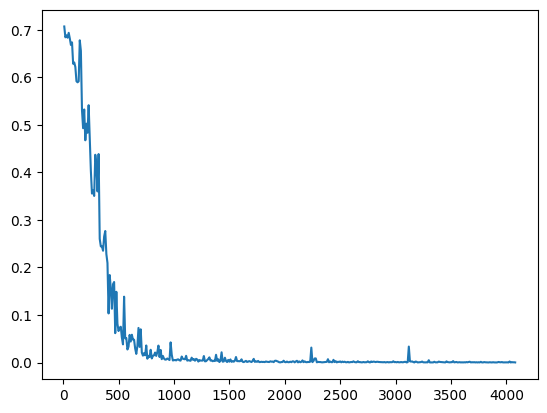

Epoch:  51
Accuracy of the network on the validation set: 69 %


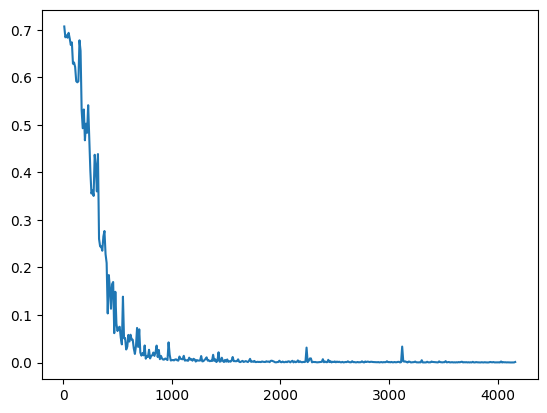

Epoch:  52
Accuracy of the network on the validation set: 70 %


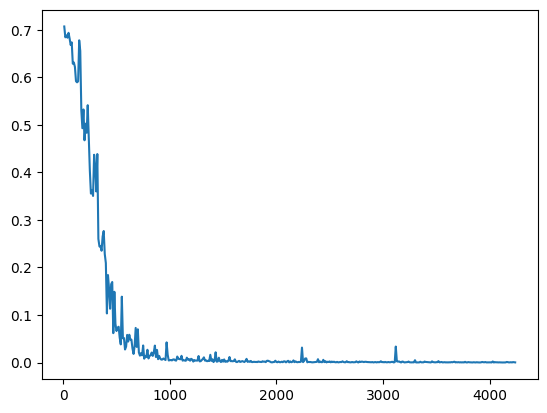

Epoch:  53
Accuracy of the network on the validation set: 71 %


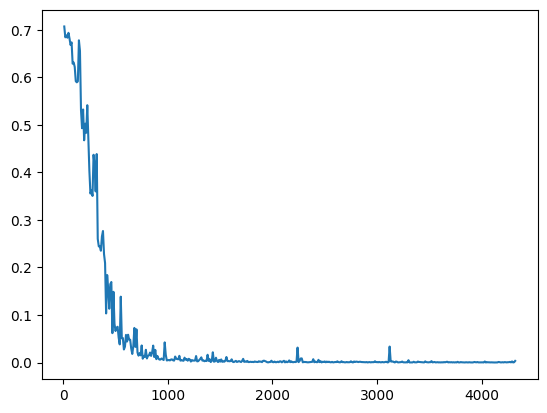

Epoch:  54
Accuracy of the network on the validation set: 71 %


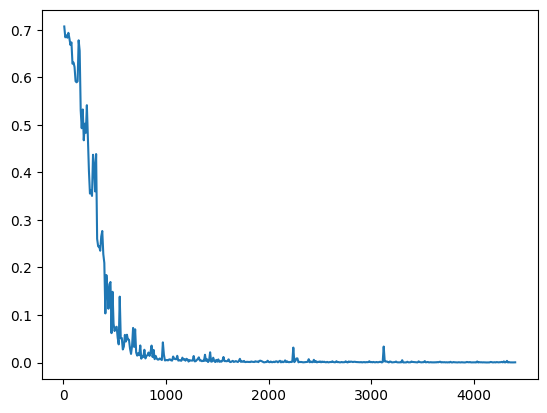

Epoch:  55
Accuracy of the network on the validation set: 70 %


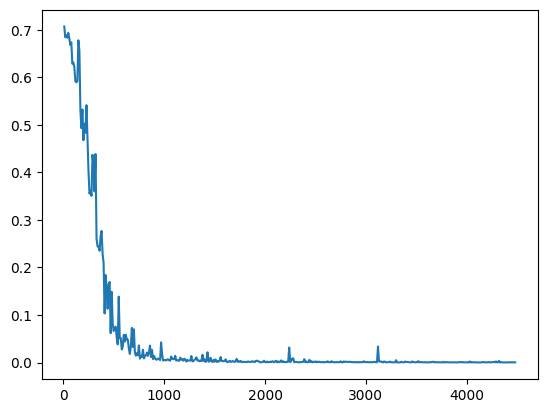

Epoch:  56
Accuracy of the network on the validation set: 69 %


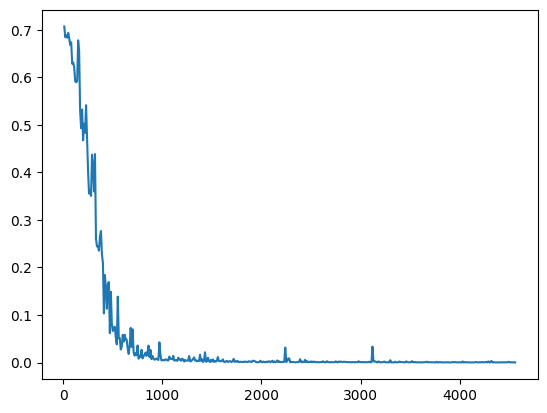

Epoch:  57
Accuracy of the network on the validation set: 69 %


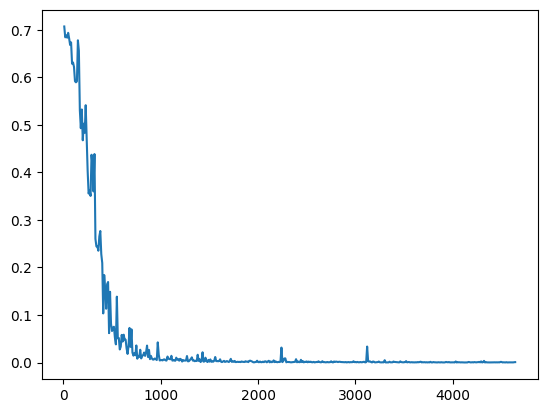

Epoch:  58
Accuracy of the network on the validation set: 70 %


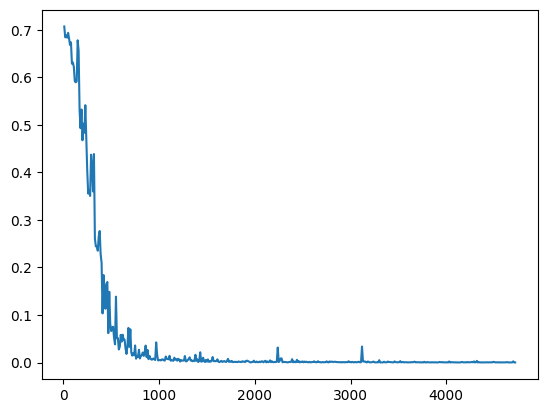

Epoch:  59
Accuracy of the network on the validation set: 70 %


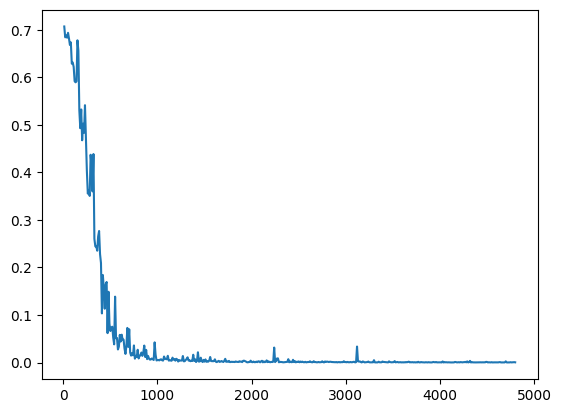

Epoch:  60
Accuracy of the network on the validation set: 71 %


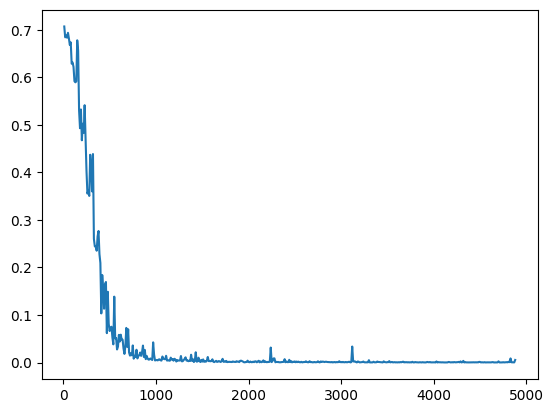

Epoch:  61
Accuracy of the network on the validation set: 69 %


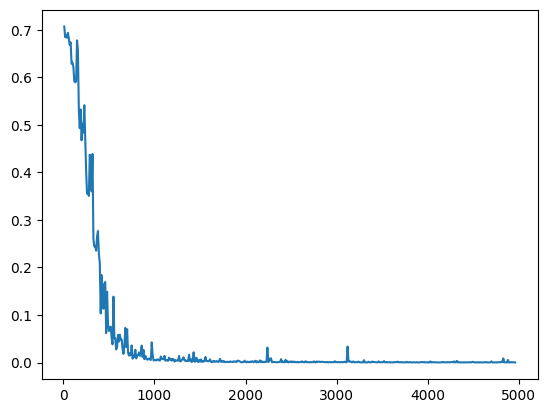

Epoch:  62
Accuracy of the network on the validation set: 70 %


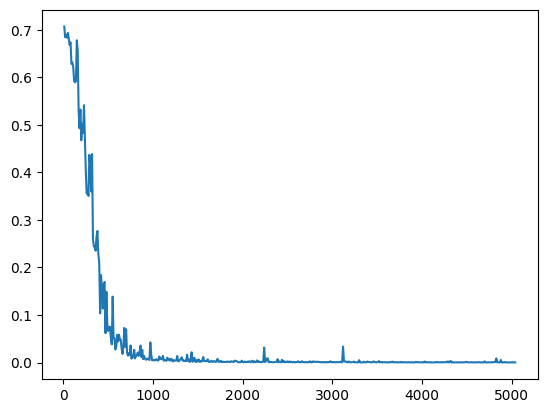

Epoch:  63
Accuracy of the network on the validation set: 70 %


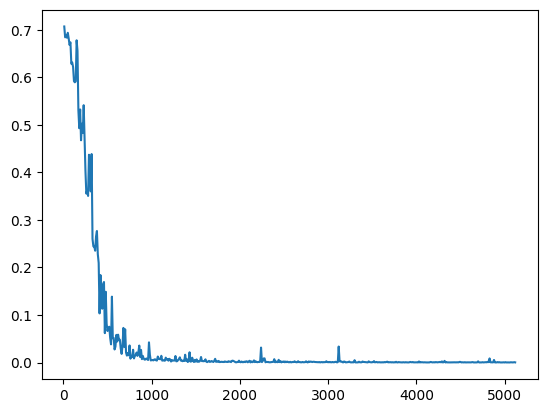

Epoch:  64
Accuracy of the network on the validation set: 70 %


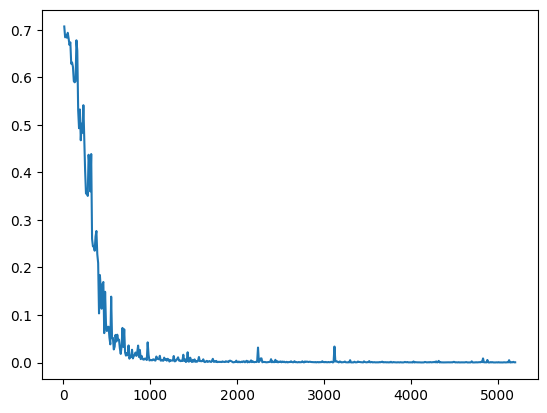

Epoch:  65
Accuracy of the network on the validation set: 71 %


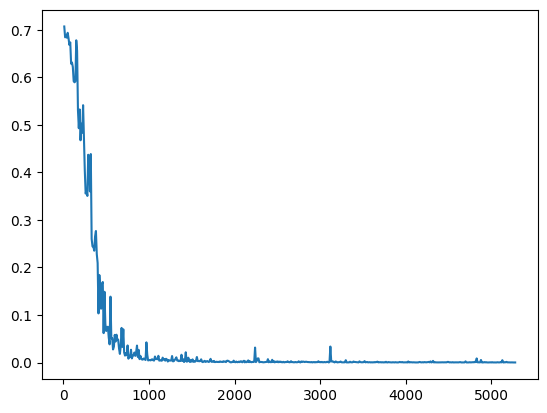

Epoch:  66
Accuracy of the network on the validation set: 71 %


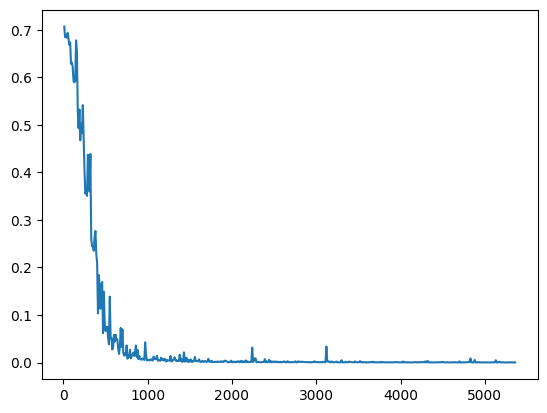

Epoch:  67
Accuracy of the network on the validation set: 71 %


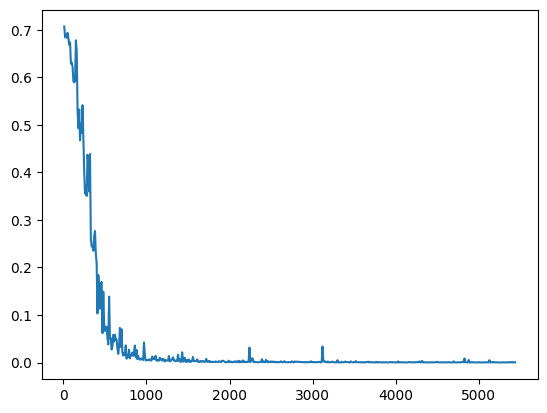

Epoch:  68
Accuracy of the network on the validation set: 71 %


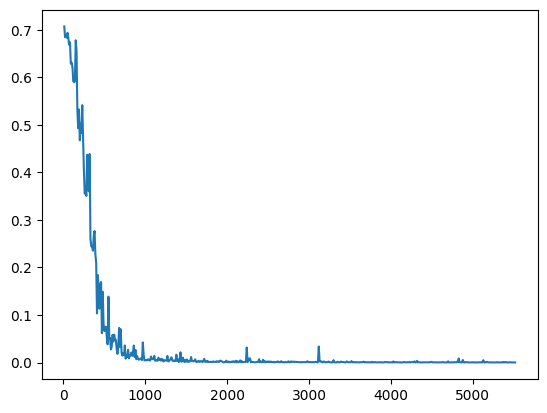

Epoch:  69
Accuracy of the network on the validation set: 70 %


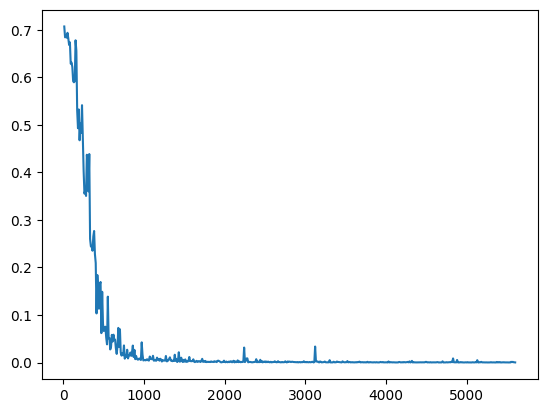

Epoch:  70
Accuracy of the network on the validation set: 70 %


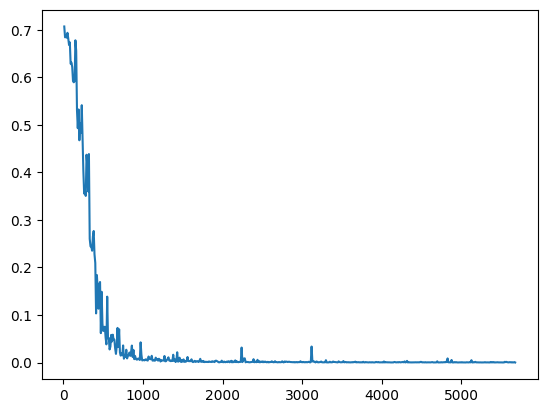

Epoch:  71
Accuracy of the network on the validation set: 70 %


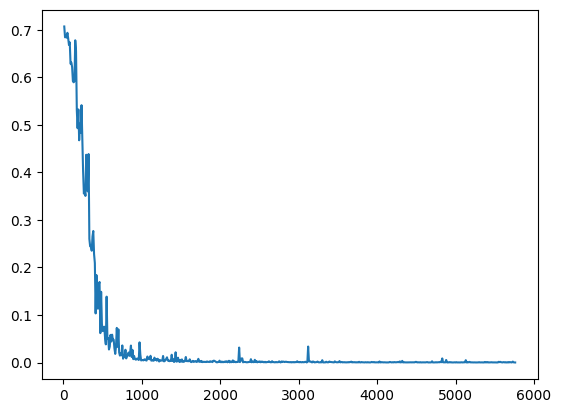

Epoch:  72
Accuracy of the network on the validation set: 71 %


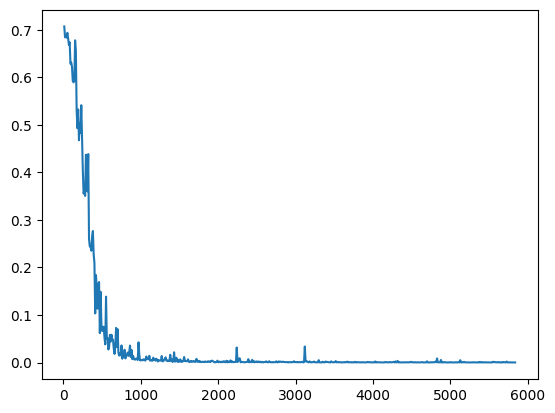

Epoch:  73
Accuracy of the network on the validation set: 70 %


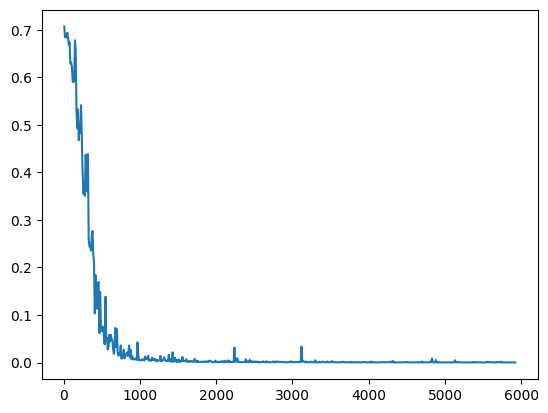

Epoch:  74
Accuracy of the network on the validation set: 70 %


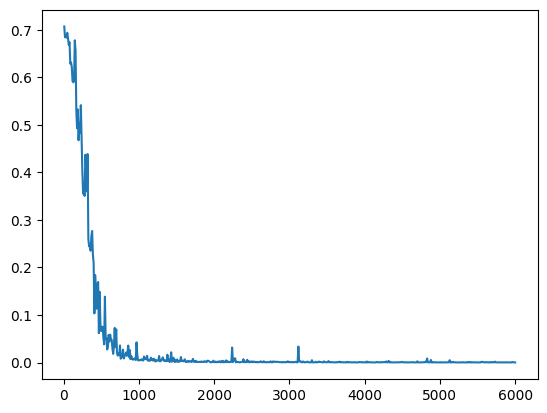

Epoch:  75
Accuracy of the network on the validation set: 72 %


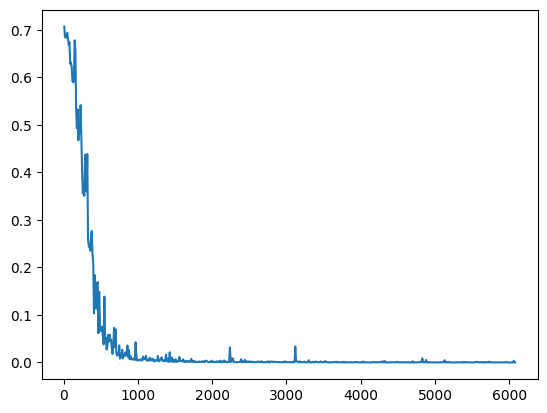

Epoch:  76
Accuracy of the network on the validation set: 70 %


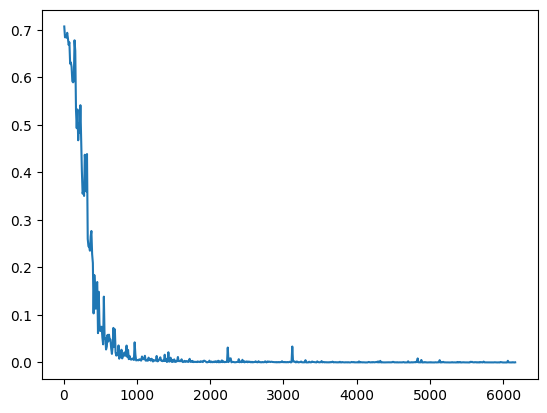

Epoch:  77
Accuracy of the network on the validation set: 70 %


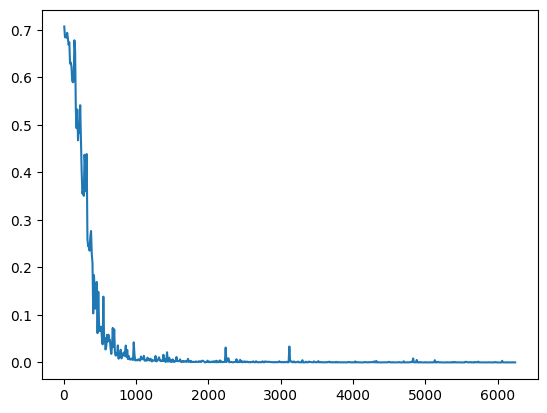

Epoch:  78
Accuracy of the network on the validation set: 70 %


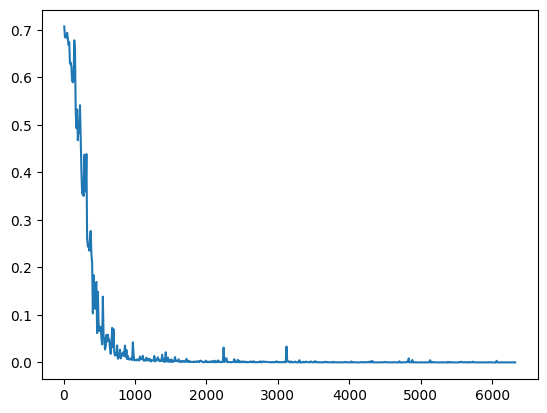

Epoch:  79
Accuracy of the network on the validation set: 70 %


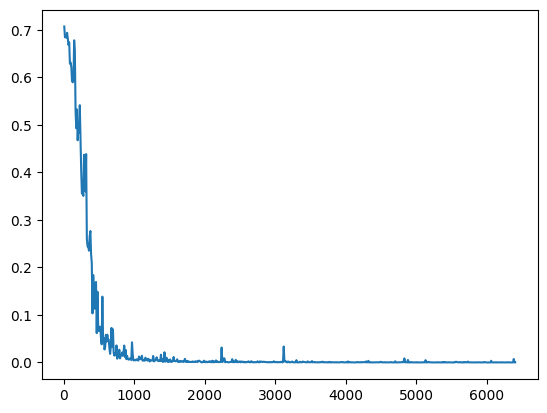

Epoch:  80
Accuracy of the network on the validation set: 70 %


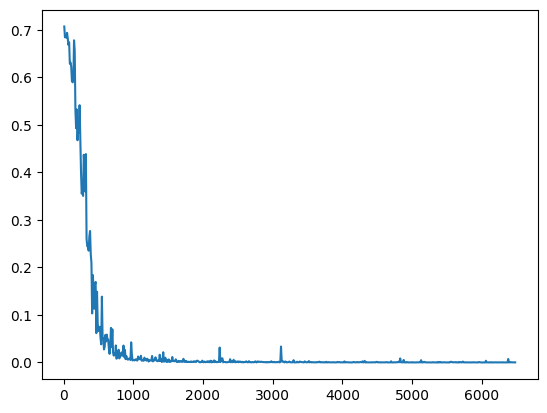

Epoch:  81
Accuracy of the network on the validation set: 71 %


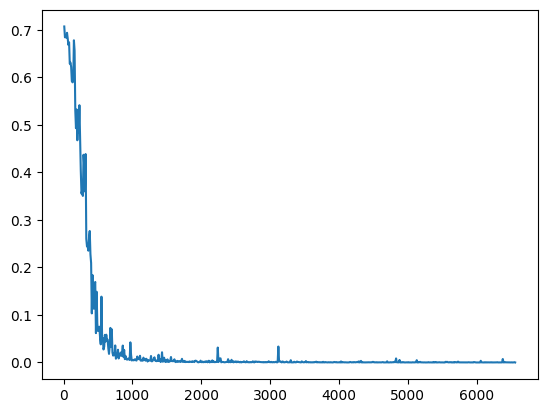

Epoch:  82
Accuracy of the network on the validation set: 69 %


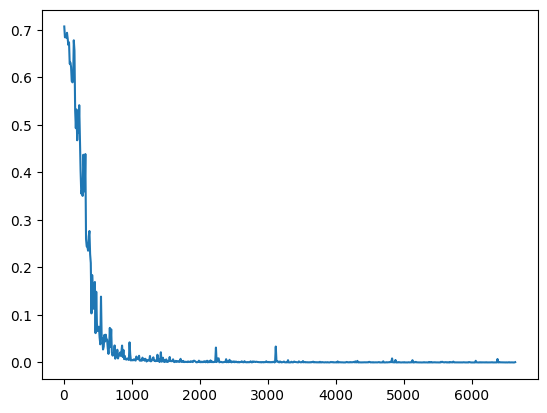

Epoch:  83
Accuracy of the network on the validation set: 70 %


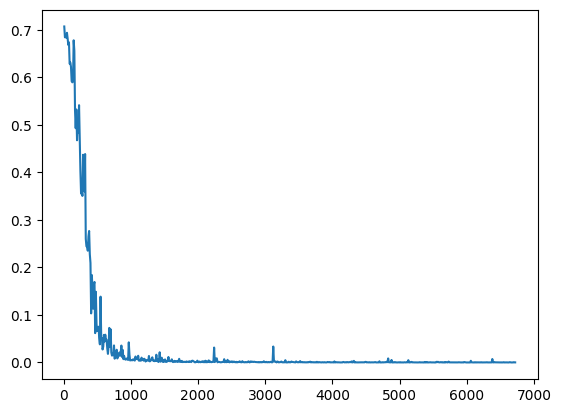

Epoch:  84
Accuracy of the network on the validation set: 70 %


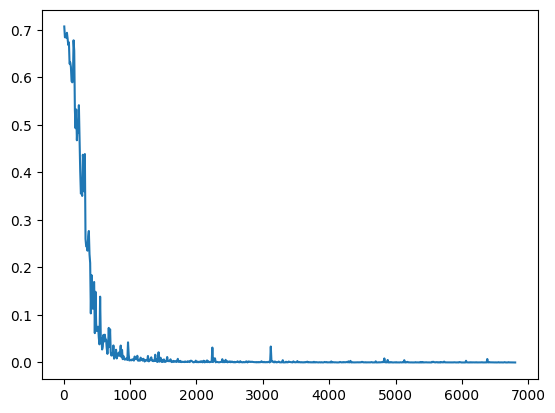

Epoch:  85
Accuracy of the network on the validation set: 71 %


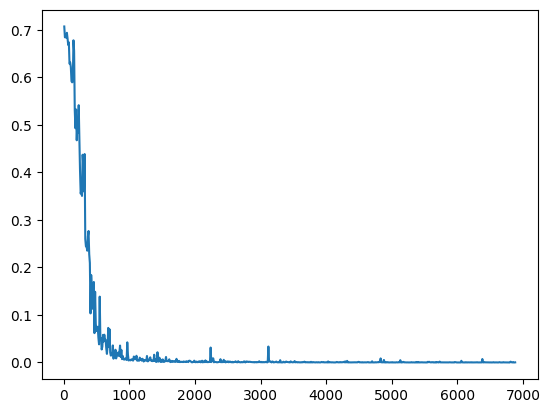

Epoch:  86
Accuracy of the network on the validation set: 71 %


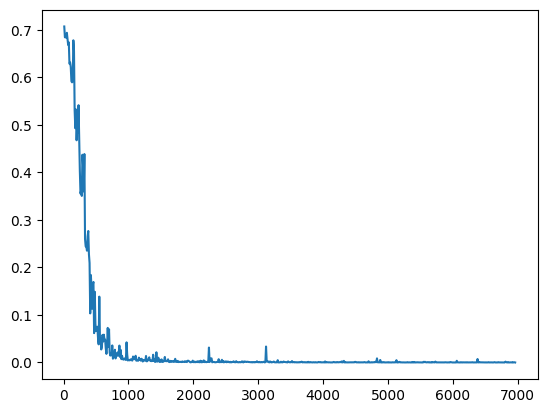

Epoch:  87
Accuracy of the network on the validation set: 70 %


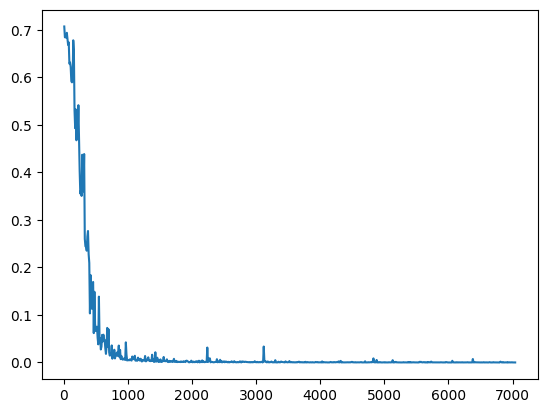

Epoch:  88
Accuracy of the network on the validation set: 71 %


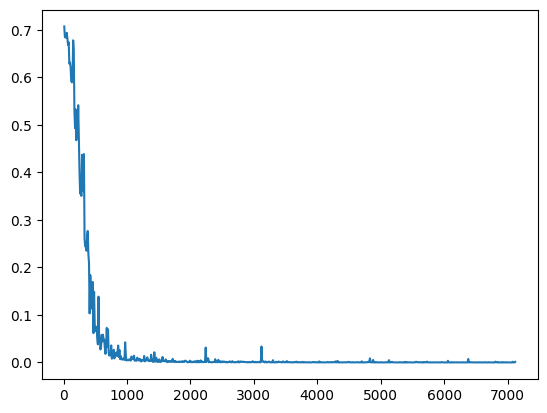

Epoch:  89
Accuracy of the network on the validation set: 68 %


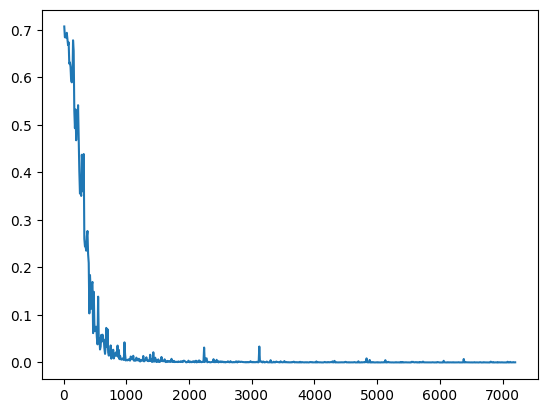

Epoch:  90
Accuracy of the network on the validation set: 71 %


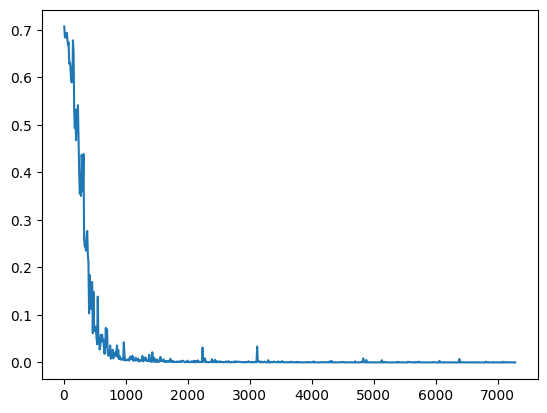

Epoch:  91
Accuracy of the network on the validation set: 70 %


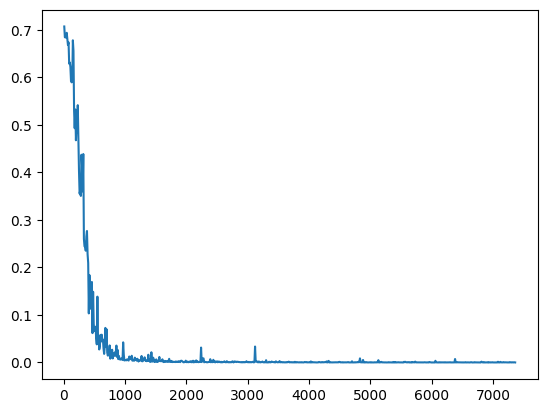

Epoch:  92
Accuracy of the network on the validation set: 70 %


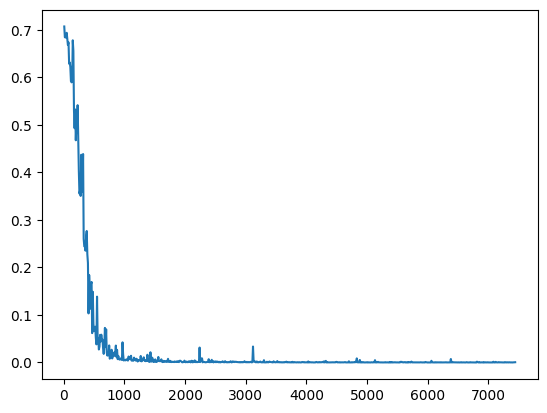

Epoch:  93
Accuracy of the network on the validation set: 70 %


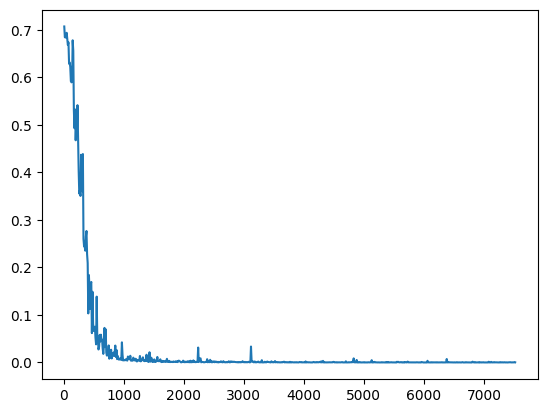

Epoch:  94
Accuracy of the network on the validation set: 70 %


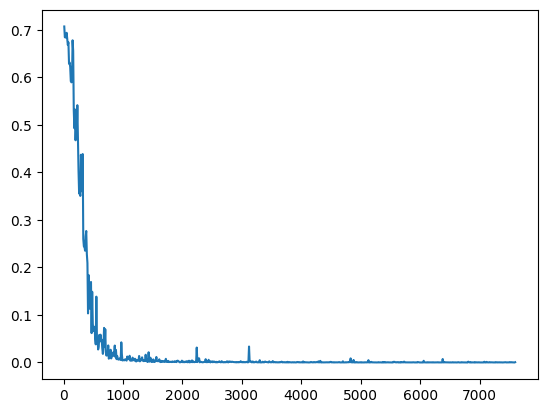

Epoch:  95
Accuracy of the network on the validation set: 70 %


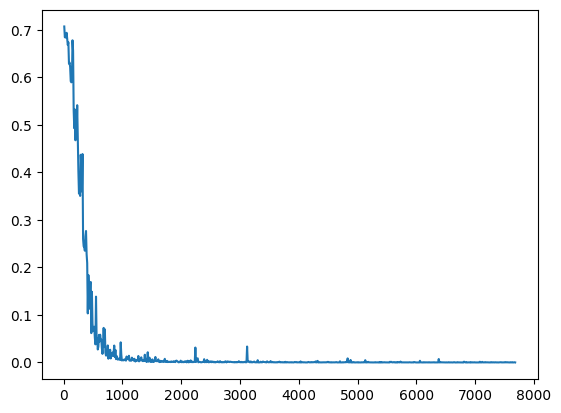

Epoch:  96
Accuracy of the network on the validation set: 69 %


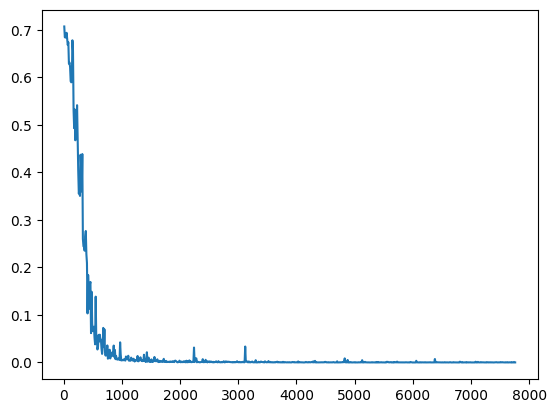

Epoch:  97
Accuracy of the network on the validation set: 69 %


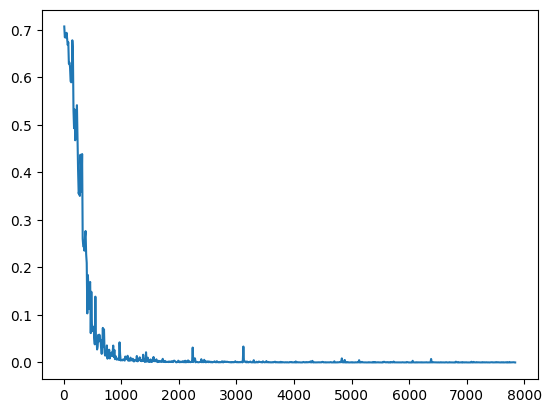

Epoch:  98
Accuracy of the network on the validation set: 71 %


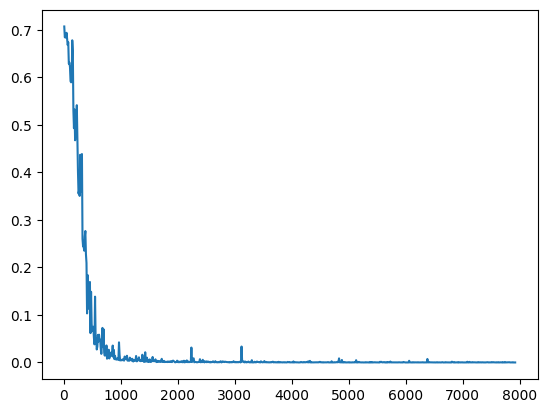

Epoch:  99
Accuracy of the network on the validation set: 70 %


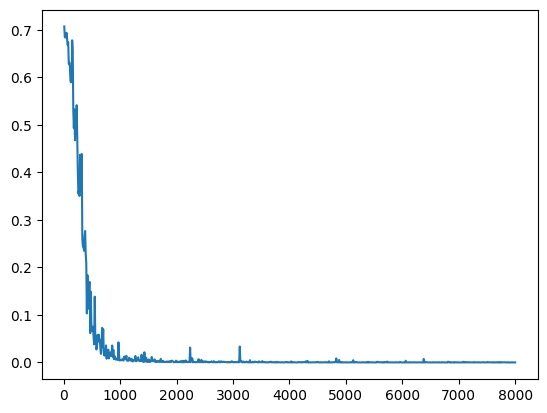

In [64]:
net = SiameseNetwork().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

counter = []
loss_history = []
iteration_number = 0

for epoch in range(0, NUMB_EPOCHS):
    print("Epoch: ", epoch)
    for i, data in enumerate(trainloader, 0):
        img0, img1, labels = data # Image shape: (batch_size, channel, IMG_SIZE, IMG_SIZE), labels shape: (batch_size)
        img0, img1, labels = img0.cuda(), img1.cuda(), labels.cuda() # Move to GPU
        optimizer.zero_grad() # Clear gradients
        outputs = net(img0, img1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if i % 10 == 0:
            iteration_number += 10
            counter.append(iteration_number)
            loss_history.append(loss.item())
            
    # Plot loss history
    correct = 0
    total = 0

    with torch.no_grad():
        for data in valloader:
            img0, img1, labels = data
            img0, img1, labels = img0.cuda(), img1.cuda(), labels.cuda()
            output = net(img0, img1)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    print('Accuracy of the network on the validation set: %d %%' % (100 * correct / total))
    plt.plot(counter, loss_history)
    plt.show()